# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (File -> Download as -> PDF via LaTeX). You should then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

In [1]:
import tensorflow as tf
from scipy.io import loadmat

![SVHN overview image](data/svhn_examples.jpg)
For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an  image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images. 

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [2]:
# Run this cell to load the dataset

train = loadmat('data/train_32x32.mat')
test = loadmat('data/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [3]:
#Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.

X_train = train['X']
X_test = test['X']
y_train = train['y']
y_test = test['y']

In [4]:
X_train.shape,X_test.shape

((32, 32, 3, 73257), (32, 32, 3, 26032))

In [5]:
import numpy as np

X_train = np.moveaxis(X_train, -1, 0)
X_test = np.moveaxis(X_test, -1 , 0)

X_train.shape,X_test.shape

((73257, 32, 32, 3), (26032, 32, 32, 3))

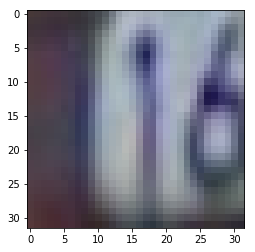

[1]


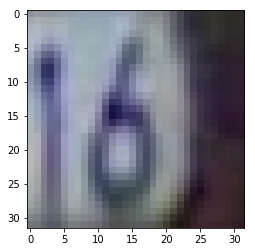

[6]


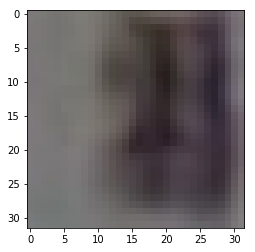

[2]


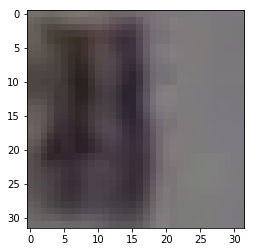

[3]


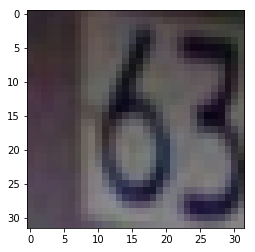

[6]


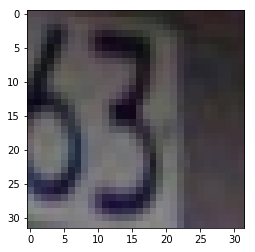

[3]


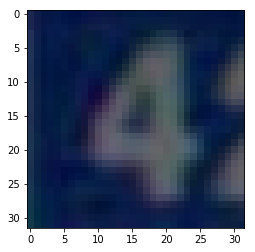

[4]


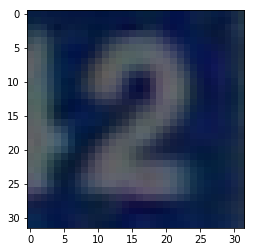

[2]


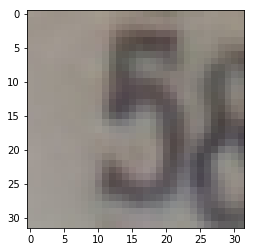

[5]


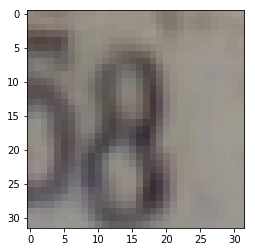

[8]


In [6]:
#Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.

import matplotlib.pyplot as plt
%matplotlib inline

for i in range(20,30):
    plt.imshow(X_train[i, :, :, :,])
    plt.show()
    print(y_train[i])

In [7]:
#Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. 
#Hint: retain the channel dimension, which will now have size 1.

X_train_grayscale = np.mean(X_train, 3).reshape(73257, 32, 32, 1)/255
X_test_grayscale = np.mean(X_test,3).reshape(26032, 32,32 ,1)/255

In [8]:
X_train_grayscale_plot = np.mean(X_train,3)

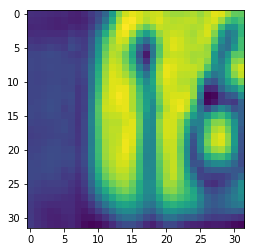

[1]


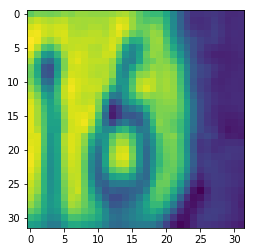

[6]


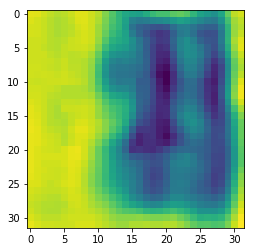

[2]


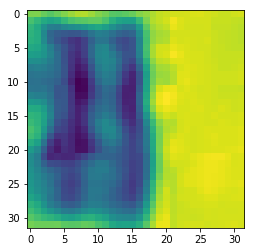

[3]


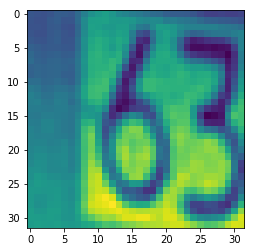

[6]


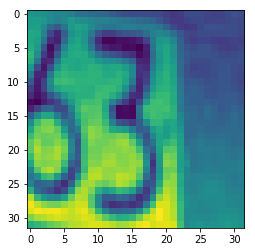

[3]


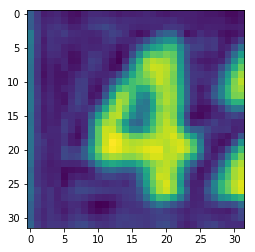

[4]


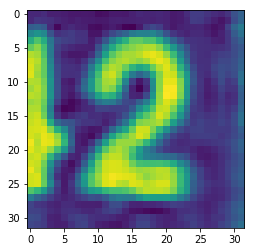

[2]


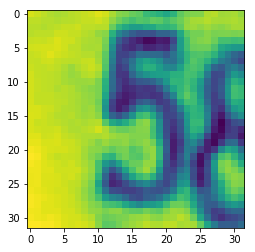

[5]


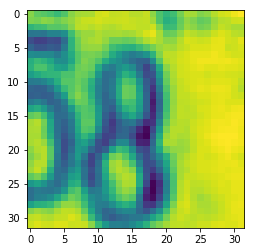

[8]


In [9]:
#Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), 
#and display them in a figure

for i in range(20,30):
    plt.imshow(X_train_grayscale_plot[i, :, :,])
    plt.show()
    print(y_train[i])

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout,BatchNormalization, Conv2D, MaxPool2D

In [11]:
# from tensorflow.keras.utils import to_categorical
# y_train_binary = to_categorical(y_train)
# y_test_binary = to_categorical(y_test)

In [12]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder().fit(y_train)
y_train_encoded = enc.transform(y_train).toarray()
y_test_encoded = enc.transform(y_test).toarray()

In [13]:
X_train[0].shape

(32, 32, 3)

In [14]:
model_mlp = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(256, activation='relu'),
    Dense(128,activation='relu'),
    BatchNormalization(momentum=0.98, epsilon=0.002),
    Dense(128,activation='relu'),
    Dropout(0.2),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')
])
model_mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               786688    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization (BatchNo (None, 128)               512       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(filepath = "mlp_weights", 
                             save_best_only=True, save_weights_only=True,
                             monitor='val_loss', verbose=1)
early_stopping = EarlyStopping(patience=3, monitor='loss')

In [16]:
history = model_mlp.fit(X_train, y_train_encoded,
                        batch_size=128,
                        callbacks=[checkpoint, early_stopping],
                        validation_data=(X_test, y_test_encoded), epochs=25)

Train on 73257 samples, validate on 26032 samples
Epoch 1/25
73216/73257 [============================>.] - ETA: 0s - loss: 1.8046 - acc: 0.3625
Epoch 00001: val_loss improved from inf to 1.88761, saving model to mlp_weights
73257/73257 [==============================] - 60s 817us/sample - loss: 1.8045 - acc: 0.3626 - val_loss: 1.8876 - val_acc: 0.3897
Epoch 2/25
73216/73257 [============================>.] - ETA: 0s - loss: 1.3235 - acc: 0.5642
Epoch 00002: val_loss improved from 1.88761 to 1.70144, saving model to mlp_weights
73257/73257 [==============================] - 52s 708us/sample - loss: 1.3235 - acc: 0.5642 - val_loss: 1.7014 - val_acc: 0.5164
Epoch 3/25
73216/73257 [============================>.] - ETA: 0s - loss: 1.1750 - acc: 0.6258
Epoch 00003: val_loss improved from 1.70144 to 1.68834, saving model to mlp_weights
73257/73257 [==============================] - 52s 707us/sample - loss: 1.1749 - acc: 0.6259 - val_loss: 1.6883 - val_acc: 0.5216
Epoch 4/25
73088/73257 [===

Text(0.5, 1.0, 'Loss vs Epoch')

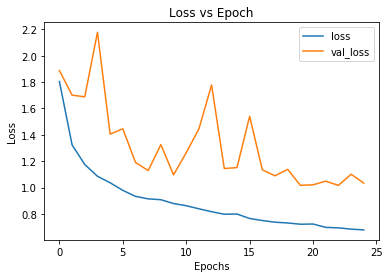

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','val_loss'], loc='upper right')
plt.title("Loss vs Epoch")

Text(0.5, 1.0, 'Accuracy vs Epoch')

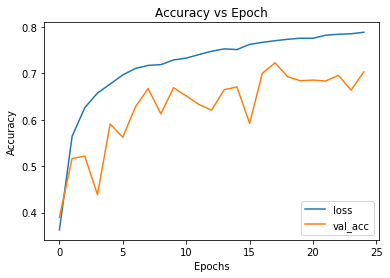

In [18]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['loss','val_acc'], loc='lower right')
plt.title("Accuracy vs Epoch")

## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [19]:
model_cnn = Sequential([
    Conv2D(filters=32, input_shape=(32,32,3),kernel_size=(3,3),activation='relu'),
    MaxPool2D(pool_size=(3,3)),
    Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    MaxPool2D(pool_size=(3,3)),
    BatchNormalization(momentum=0.98),
    Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
    Dropout(0.02),
    Flatten(),
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')
])
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 3, 3, 64)          256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 64)         

In [20]:
checkpoint_cnn = ModelCheckpoint(filepath="cnn_weights",save_best_only=True, save_weights_only=True, save_freq='epoch', 
                                    monitor='val_loss',mode='min',verbose=1)
earlystopping_cnn = EarlyStopping(patience=3,monitor='val_loss')

In [21]:
history = model_cnn.fit(X_train, y_train_encoded, 
                     batch_size=64,
                     callbacks=[checkpoint_cnn, earlystopping_cnn],
                     validation_data=(X_test, y_test_encoded), epochs=15)

Train on 73257 samples, validate on 26032 samples
Epoch 1/15
73216/73257 [============================>.] - ETA: 0s - loss: 0.8068 - acc: 0.7407
Epoch 00001: val_loss improved from inf to 0.55817, saving model to cnn_weights
73257/73257 [==============================] - 378s 5ms/sample - loss: 0.8066 - acc: 0.7407 - val_loss: 0.5582 - val_acc: 0.8485
Epoch 2/15
73216/73257 [============================>.] - ETA: 0s - loss: 0.4293 - acc: 0.8706
Epoch 00002: val_loss improved from 0.55817 to 0.49575, saving model to cnn_weights
73257/73257 [==============================] - 360s 5ms/sample - loss: 0.4292 - acc: 0.8707 - val_loss: 0.4958 - val_acc: 0.8560
Epoch 3/15
73216/73257 [============================>.] - ETA: 0s - loss: 0.3586 - acc: 0.8923
Epoch 00003: val_loss improved from 0.49575 to 0.41634, saving model to cnn_weights
73257/73257 [==============================] - 372s 5ms/sample - loss: 0.3586 - acc: 0.8923 - val_loss: 0.4163 - val_acc: 0.8783
Epoch 4/15
73216/73257 [======

Text(0.5, 1.0, 'Loss vs Epoch')

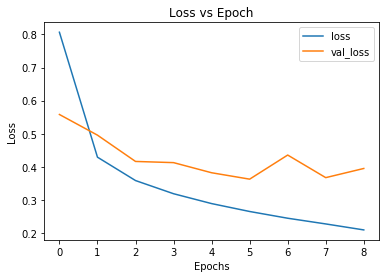

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','val_loss'], loc='upper right')
plt.title("Loss vs Epoch")

Text(0.5, 1.0, 'Accuracy vs Epoch')

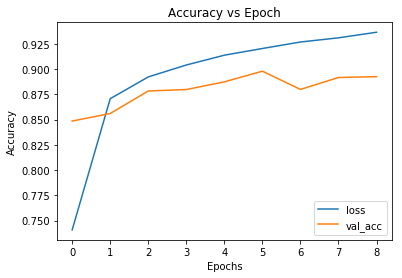

In [23]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['loss','val_acc'], loc='lower right')
plt.title("Accuracy vs Epoch")

## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [25]:
model_cnn.load_weights("cnn_weights")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


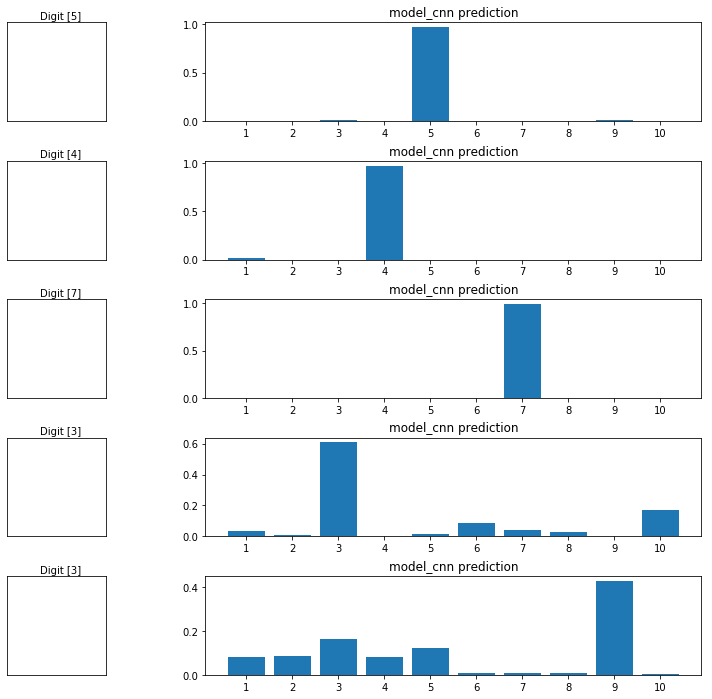

In [32]:
import random

num_test_images = X_test.shape[0]

random_inx = np.random.choice(num_test_images, 5)
random_test_images = X_test[random_inx, ...]
random_test_images = tf.cast(random_test_images, tf.float32)
random_test_labels = y_test[random_inx, ...]

predictions = model_cnn.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(1,11), prediction)
    axes[i, 1].set_xticks(np.arange(1,11))
    axes[i, 1].set_title("model_cnn prediction")
    
plt.show()

In [28]:
model_mlp.load_weights("mlp_weights")

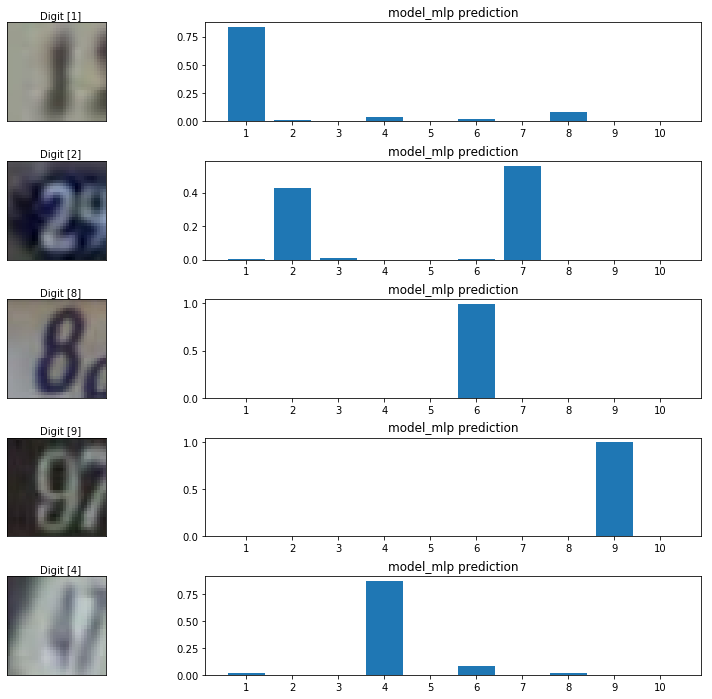

In [29]:
num_test_images = X_test.shape[0]

random_inx = np.random.choice(num_test_images, 5)
random_test_images = X_test[random_inx, ...]
random_test_labels = y_test[random_inx, ...]

predictions = model_mlp.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(1,11), prediction)
    axes[i, 1].set_xticks(np.arange(1,11))
    axes[i, 1].set_title("model_mlp prediction")
    
plt.show()

In [ ]:
! ls -lh